### **Sentiment Analysis of Restaurant Review with PorterStemmer**

In [ ]:
# Import Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn. feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# Load dataset
data=pd.read_csv('/content/Restaurant_Reviews 1.tsv', delimiter='\t', quoting=3)


In [ ]:

# Display dataset information and preview
print("Dataset Info:")
print(data.info())

print("\nClass Distribution:")
print(data['Liked'].value_counts())

print("\nMissing Values:")
print(data.isnull().sum())

print("\nDataset Preview:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None

Class Distribution:
Liked
1    500
0    500
Name: count, dtype: int64

Missing Values:
Review    0
Liked     0
dtype: int64

Dataset Preview:
                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


<ipython-input-10-cc36450c746b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Liked', data=data, palette='viridis')


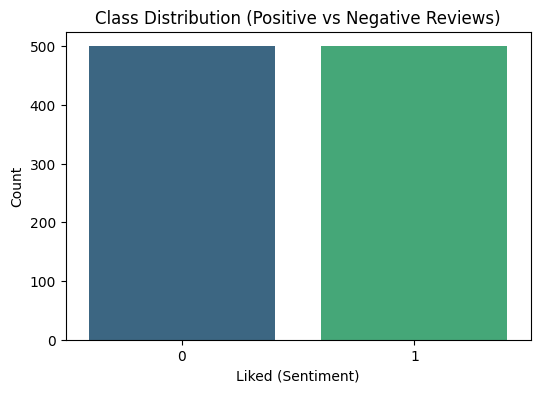

In [ ]:
# Visualize Dataset

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Liked', data=data, palette='viridis')
plt.title("Class Distribution (Positive vs Negative Reviews)")
plt.xlabel("Liked (Sentiment)")
plt.ylabel("Count")
plt.show()


In [ ]:
# Preprocessing data
nltk.download('stopwords')


# Initialize stemmer
ps = PorterStemmer()

# Preprocess each review
corpus = []
for review in data['Review']:
    # Remove non-alphabetic characters
    review = re.sub('[^a-zA-Z]', ' ', review)
    # Convert to lowercase
    review = review.lower()
    # Tokenize and remove stopwords
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    # Join the processed words back into a single string
    review = ' '.join(review)
    corpus.append(review)

print("Sample Preprocessed Review:")
print(corpus[:5])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Sample Preprocessed Review:
['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price']


In [ ]:
# 4. Feature Extraction: Count Vectorizer and TF-IDF

# Count Vectorizer
cv = CountVectorizer(max_features=1500)
X_cv = cv.fit_transform(corpus).toarray()

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1500)
X_tfidf = tfidf.fit_transform(corpus).toarray()

# Target variable
y = data['Liked']

# Output shapes
print("Shape of Count Vectorized data:", X_cv.shape)
print("Shape of TF-IDF data:", X_tfidf.shape)

Shape of Count Vectorized data: (1000, 1500)
Shape of TF-IDF data: (1000, 1500)


In [ ]:
# Split the Dataset

# Split for Count Vectorizer
X_train_cv, X_test_cv, y_train, y_test = train_test_split(X_cv, y, test_size=0.2, random_state=0)

# Split for TF-IDF
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=0)


In [ ]:
# Train Multiple ML Models and Evaluate

# Initialize classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=0),
    "SVM": SVC(kernel='linear', random_state=0)
}

# Evaluate models
results = {}
for name, model in models.items():
    # Train and predict with Count Vectorizer
    model.fit(X_train_cv, y_train)
    y_pred_cv = model.predict(X_test_cv)

    # Train and predict with TF-IDF
    model.fit(X_train_tfidf, y_train)
    y_pred_tfidf = model.predict(X_test_tfidf)

    # Store results
    results[name] = {
        "Count Vectorizer": {
            "Accuracy": accuracy_score(y_test, y_pred_cv),
            "Confusion Matrix": confusion_matrix(y_test, y_pred_cv)
        },
        "TF-IDF": {
            "Accuracy": accuracy_score(y_test, y_pred_tfidf),
            "Confusion Matrix": confusion_matrix(y_test, y_pred_tfidf)
        }
    }

# Display results
for name, result in results.items():
    print(f"\nModel: {name}")
    for method, metrics in result.items():
        print(f"  Using {method}:")
        print(f"    Accuracy: {metrics['Accuracy']}")
        print(f"    Confusion Matrix:\n{metrics['Confusion Matrix']}")


Model: Logistic Regression
  Using Count Vectorizer:
    Accuracy: 0.71
    Confusion Matrix:
[[76 21]
 [37 66]]
  Using TF-IDF:
    Accuracy: 0.755
    Confusion Matrix:
[[85 12]
 [37 66]]

Model: Random Forest
  Using Count Vectorizer:
    Accuracy: 0.7
    Confusion Matrix:
[[85 12]
 [48 55]]
  Using TF-IDF:
    Accuracy: 0.73
    Confusion Matrix:
[[90  7]
 [47 56]]

Model: SVM
  Using Count Vectorizer:
    Accuracy: 0.72
    Confusion Matrix:
[[74 23]
 [33 70]]
  Using TF-IDF:
    Accuracy: 0.73
    Confusion Matrix:
[[80 17]
 [37 66]]


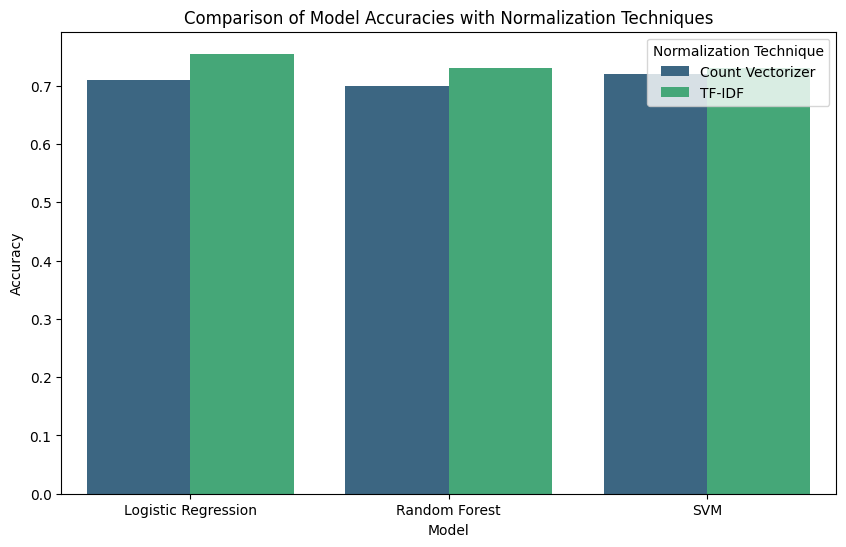

In [ ]:
# Accuracy comparison plot
accuracy_data = {
    "Model": [],
    "Normalization": [],
    "Accuracy": []
}

for name, result in results.items():
    for method, metrics in result.items():
        accuracy_data["Model"].append(name)
        accuracy_data["Normalization"].append(method)
        accuracy_data["Accuracy"].append(metrics["Accuracy"])

# Convert to DataFrame for plotting
accuracy_df = pd.DataFrame(accuracy_data)

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=accuracy_df, x="Model", y="Accuracy", hue="Normalization", palette="viridis")
plt.title("Comparison of Model Accuracies with Normalization Techniques")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.legend(title="Normalization Technique")
plt.show()


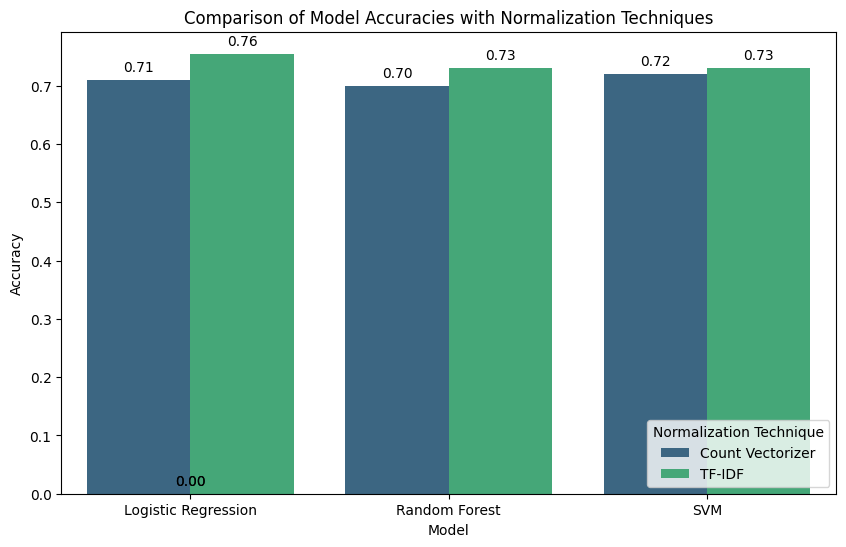

In [ ]:
# Plot accuracy comparison
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=accuracy_df, x="Model", y="Accuracy", hue="Normalization", palette="viridis")
for p in ax.patches:
    ax.annotate(format(p.get_height(), ".2f"),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = "center", va = "center",
                xytext = (0, 9),
                textcoords = "offset points")
plt.title("Comparison of Model Accuracies with Normalization Techniques")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.legend(title="Normalization Technique")
plt.show()